In [1]:
import sys
import delivery_driver as dd
sys.path.append("../../deliveryrobot")
from utilities.utilities import *
from kinematics.movementai import *
import time
import math

In [2]:
start_time = time.time()
robot = dd.DeliveryRobot()
print(f"Robot setup complete in {time.time()-start_time} seconds")

target = math.pi/4

Robot setup complete in 0.9267008304595947 seconds


Added data point: time=1725759058.137691, position=[-2.5, 0.0], orientation=0.0, velocity=None, angular_velocity=None, acceleration=None, angular_acceleration=None
Added data point: time=1725759058.1408403, position=[0.0, 0.0], orientation=0.0, velocity=None, angular_velocity=None, acceleration=None, angular_acceleration=None
Added data point: time=1725759058.169398, position=[-2.5  0. ], orientation=0.0, velocity=[0. 0.], angular_velocity=0.0, acceleration=[0. 0.], angular_acceleration=0.0
IDX No 1 STATES LEN 6
1725759058.173617 steering [0.01 0.  ] 0.0
Added data point: time=1725759058.4663093, position=[-2.48571246  0.        ], orientation=0.0, velocity=[0.01 0.  ], angular_velocity=0.0, acceleration=[0.01 0.  ], angular_acceleration=0.0
IDX No 1 STATES LEN 6
1725759058.470121 steering [0.01 0.  ] 0.0
Added data point: time=1725759058.7610567, position=[-2.36404379  0.        ], orientation=0.0, velocity=[0.015 0.   ], angular_velocity=0.0, acceleration=[0.01 0.  ], angular_acceler

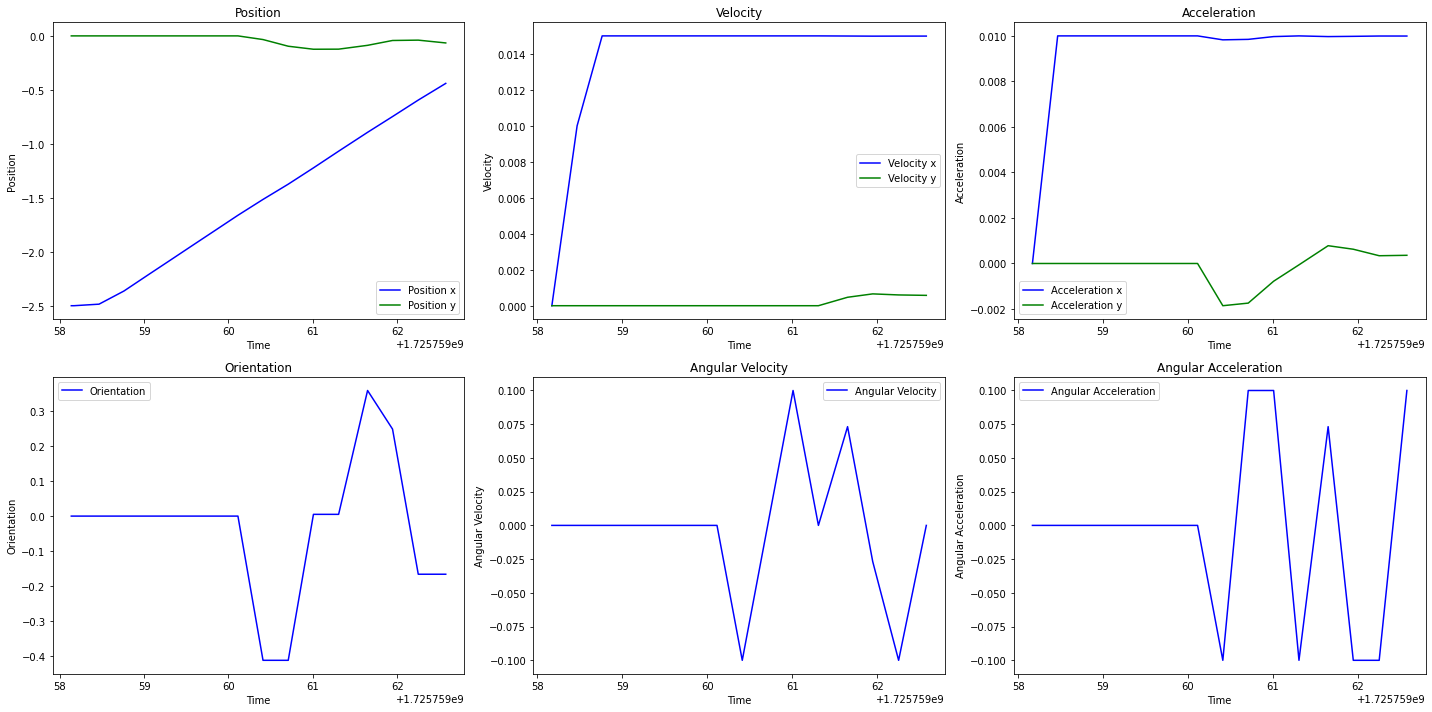

In [3]:
# set desired move information
inverse = True

if not inverse:
    robot_state = [0.00,  0.00, 0.00]
    goal_state = [2.5, 0.0, 0.0]
    path = [
        (  0, [0.00,  0.00, 0.00]),
        (  1, [0.5,  0.00, 0.00]),
        ( 14, [1.0, 0.00, 0.00]),
        ( 65, [1.5, -0.125, 0.00]),
        (100, [2.0,  0.00, 0.00]),
        (120, [2.5,  0.00, 0.00])
    ]
else:
    robot_state = [-2.50,  0.00, 0.00]
    goal_state = [0., 0.0, 0.0]
    path = [
        (  0, [-2.50,  0.00, 0.00]),
        ( 14, [-2.0, 0.00, 0.00]),
        ( 65, [-1.5, 0.00, 0.00]),
        (100, [-1.0, -0.125, 0.00]),
        (120, [0.5,  0.00, 0.00]),
        (1220, [0.,  0.00, 0.00])
    ]
    
robot.update_path_ai(path)
robot.slam_update_ai(robot_state, goal_state)

# setup time variables
goal_time = 1
call_time = 0
total_time = 0
start_time = time.time()
last_call = time.time()

ongoing = 1

while ongoing:
    
    ongoing, _, _, _ = robot.path_follow_ai(goal_time, call_time)
    
    # get time it took to make the call
    last_call = time.time()
    call_time = last_call - start_time
    total_time+=call_time
    
    # set a new start time
    start_time = time.time()
    
    # testing pause
    time.sleep(0.25)
    
    
    if total_time > 4:
        robot.robot.stop()
        
        break

robot.target_ai.slam_update(goal_state)
print(f"targeting {goal_state} from {robot.robot_ai.position}")

while robot.arrive_ai(goal_time, call_time):
    
    # get time it took to make the call
    last_call = time.time()
    call_time = last_call - start_time
    total_time+=call_time
    
    # set a new start time
    start_time = time.time()
    
    if total_time > 4:
        robot.robot.stop()
        break

robot.robot.stop()
robot.robot_ai.kplot.plot_data()
target += math.pi/4

# 

In [4]:
robot.robot.stop()